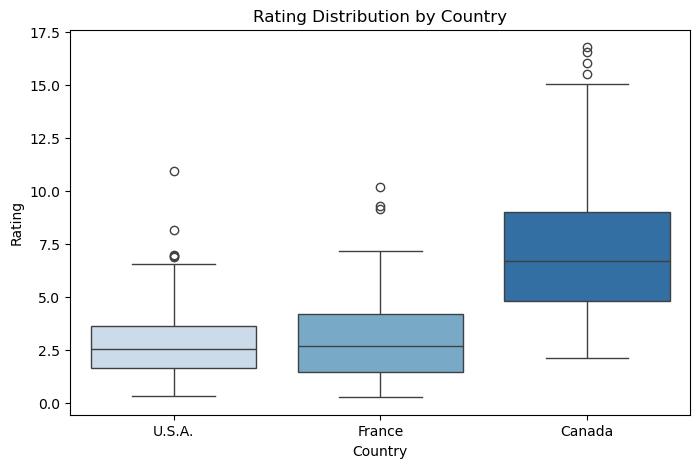

U.S.A.: Shapiro-Wilk p-value = 0.0000 (p < 0.05 means non-normal)
France: Shapiro-Wilk p-value = 0.0000 (p < 0.05 means non-normal)
Canada: Shapiro-Wilk p-value = 0.0000 (p < 0.05 means non-normal)
Levene’s test p-value: 0.0000 (p < 0.05 means unequal variance)

ANOVA Results:
                sum_sq     df           F        PR(>F)
Country   1318.084204    2.0  100.228082  5.448067e-34
Residual  1952.900827  297.0         NaN           NaN

Kruskal-Wallis Test p-value: 0.0000 (use this when ANOVA assumptions fail)


In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
np.random.seed(42)
usa_ratings = np.random.gamma(shape=2.0, scale=1.5, size=100)
france_ratings = np.random.gamma(shape=2.0, scale=1.5, size=100)
canada_ratings = np.random.gamma(shape=5.0, scale=1.5, size=100)  # Different shape
df = pd.DataFrame({
    'Rating': np.concatenate([usa_ratings, france_ratings, canada_ratings]),
    'Country': ['U.S.A.'] * 100 + ['France'] * 100 + ['Canada'] * 100
})
plt.figure(figsize=(8, 5))
sns.boxplot(x='Country', y='Rating', data=df, hue='Country', palette="Blues", legend=False)
plt.title("Rating Distribution by Country")
plt.show()
for country in df['Country'].unique():
    stat, p = stats.shapiro(df[df['Country'] == country]['Rating'])
    print(f"{country}: Shapiro-Wilk p-value = {p:.4f} (p < 0.05 means non-normal)")
stat, p = stats.levene(
    df[df['Country'] == 'U.S.A.']['Rating'],
    df[df['Country'] == 'France']['Rating'],
    df[df['Country'] == 'Canada']['Rating']
)
print(f"Levene’s test p-value: {p:.4f} (p < 0.05 means unequal variance)")
model = ols('Rating ~ Country', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Results:\n", anova_table)
h_stat, h_p = stats.kruskal(
    df[df['Country'] == 'U.S.A.']['Rating'],
    df[df['Country'] == 'France']['Rating'],
    df[df['Country'] == 'Canada']['Rating']
)
print(f"\nKruskal-Wallis Test p-value: {h_p:.4f} (use this when ANOVA assumptions fail)")
